In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
om = pd.read_csv("Summer-Olympic-medals-1976-to-2008.csv", encoding='ISO-8859-1')

In [3]:
om

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


In [4]:
om.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


2. Understand the Dataset

In [5]:
# Data types and non-null counts

om.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [6]:
om.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [7]:
om.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [8]:
om.nunique()

City                9
Year                9
Sport              28
Discipline         41
Event             293
Athlete         11337
Gender              2
Country_Code      128
Country           127
Event_gender        3
Medal               3
dtype: int64

In [9]:
om.isnull().sum()

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64

3. Clean the Data

In [10]:
# Example fixes
om.drop_duplicates(inplace=True)
om.dropna(inplace=True)  # Or fill with df.fillna(method='ffill') if appropriate
om.columns = om.columns.str.strip()  # Remove whitespace

In [11]:
om

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze
...,...,...,...,...,...,...,...,...,...,...,...
15428,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"GUENOT, Christophe",Men,FRA,France,M,Bronze
15429,Beijing,2008.0,Wrestling,Wrestling Gre-R,66 - 74kg,"KVIRKELIA, Manuchar",Men,GEO,Georgia,M,Gold
15430,Beijing,2008.0,Wrestling,Wrestling Gre-R,55 - 60kg,"RAHIMOV, Vitaliy",Men,AZE,Azerbaijan,M,Silver
15431,Beijing,2008.0,Wrestling,Wrestling Gre-R,60 - 66kg,"GUENOT, Steeve",Men,FRA,France,M,Gold


4. Exploratory Data Analysis (EDA)

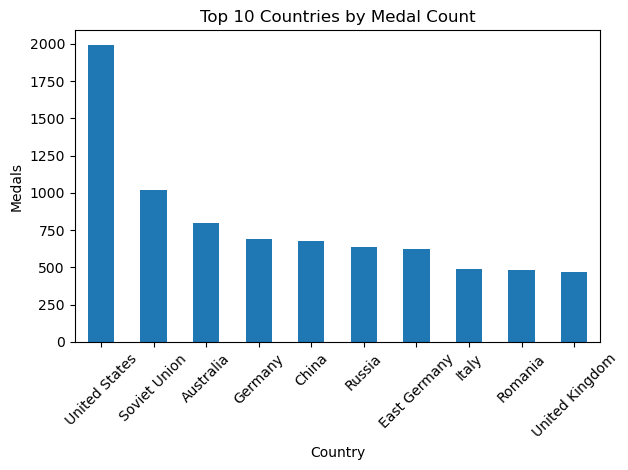

In [12]:
#➤ Total medals by country:

medals_by_country = om['Country'].value_counts().head(10)
medals_by_country.plot(kind='bar', title='Top 10 Countries by Medal Count')
plt.ylabel('Medals')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

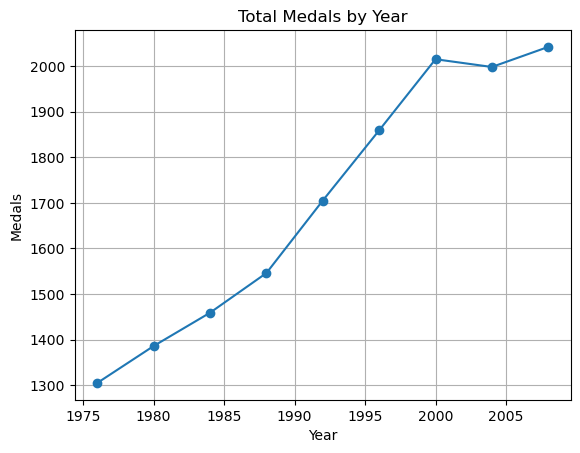

In [13]:
#Medals over the years:

medals_by_year = om['Year'].value_counts().sort_index()
medals_by_year.plot(marker='o', title='Total Medals by Year')
plt.ylabel('Medals')
plt.xlabel('Year')
plt.grid(True)
plt.show()

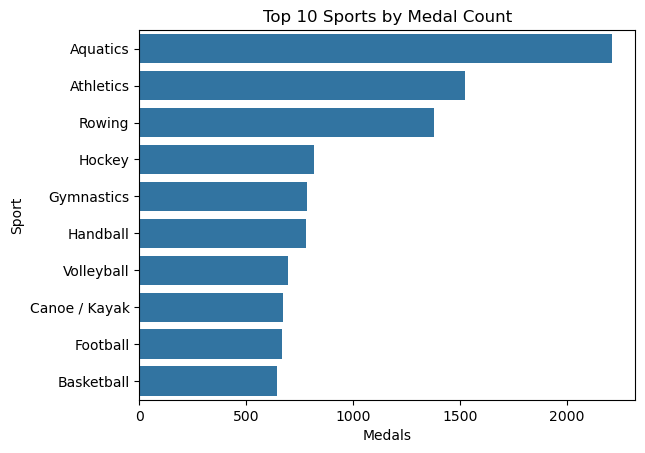

In [14]:
#➤ Medals by sport:

top_sports = om['Sport'].value_counts().head(10)
sns.barplot(x=top_sports.values, y=top_sports.index)
plt.title("Top 10 Sports by Medal Count")
plt.xlabel("Medals")
plt.ylabel("Sport")
plt.show()

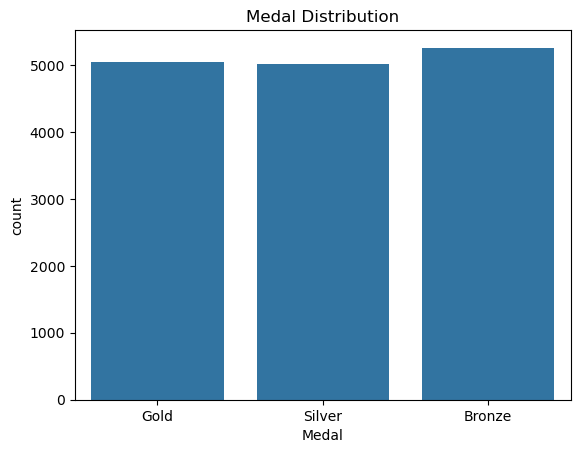

In [15]:
#➤ Medal type distribution:

sns.countplot(data=om, x='Medal', order=['Gold', 'Silver', 'Bronze'])
plt.title("Medal Distribution")
plt.show()

 5. Advanced Analysis Ideas

Most decorated athletes

Gender distribution over time

Country-wise medal share by sport

Medal trends for specific countries

Example: Top athletes

In [16]:
top_athletes = om['Athlete'].value_counts().head(10)
print(top_athletes)

Athlete
PHELPS, Michael        16
TORRES, Dara           12
THOMPSON, Jenny        12
NEMOV, Alexei          12
ANDRIANOV, Nikolay     12
FISCHER, Birgit        12
COUGHLIN, Natalie      11
BIONDI, Matthew        11
DITYATIN, Aleksandr    10
LEWIS, Carl            10
Name: count, dtype: int64


6. Save Processed Data (optional)

In [17]:
om.to_csv("cleaned_olympics.csv", index=False)

🧠 Tips
Use groupby() often for aggregations.

Use pivot_table() for multi-indexed analysis.

Combine plots for comparative insights.

